In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt
import LOB_analysis  #helper functions for loading data

## Data Loading. 
Let us load only one day of data for the `AMD` stoch on the data `2020-01-02`

In [2]:
import os
import glob
import time

In [227]:
# collect data files in the current base_directory
base_directory = '/Users/alex/dataset/LOB/AMD_jan_2020/'
MO_files = glob.glob("*.csv")
MO_files = np.sort(MO_files)
MO_files

array(['AMD_2020-01-02_24900000_57900000.csv',
       'AMD_2020-01-03_24900000_57900000.csv',
       'AMD_2020-01-06_24900000_57900000.csv',
       'AMD_2020-01-07_24900000_57900000.csv',
       'AMD_2020-01-08_24900000_57900000.csv',
       'AMD_2020-01-09_24900000_57900000.csv',
       'AMD_2020-01-10_24900000_57900000.csv',
       'AMD_2020-01-13_24900000_57900000.csv',
       'AMD_2020-01-14_24900000_57900000.csv',
       'AMD_2020-01-15_24900000_57900000.csv',
       'AMD_2020-01-16_24900000_57900000.csv',
       'AMD_2020-01-17_24900000_57900000.csv',
       'AMD_2020-01-21_24900000_57900000.csv',
       'AMD_2020-01-22_24900000_57900000.csv',
       'AMD_2020-01-23_24900000_57900000.csv',
       'AMD_2020-01-24_24900000_57900000.csv',
       'AMD_2020-01-27_24900000_57900000.csv',
       'AMD_2020-01-28_24900000_57900000.csv',
       'AMD_2020-01-29_24900000_57900000.csv',
       'AMD_2020-01-30_24900000_57900000.csv',
       'AMD_2020-01-31_24900000_57900000.csv',
       'AMD_2

In [228]:
DAYS_TO_LOAD = 50 # max number of days to load
data_full = []
for file in MO_files[:DAYS_TO_LOAD]:
    data_full.append( pd.read_csv(file) )


In [229]:
# let us look at the first day of data
data = data_full[0]
data.head()

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,bid_size_9,ask_price_10,ask_size_10,bid_price_10,bid_size_10,direct,time,vol,ask_prev,bid_prev
0,475000.0,164.0,474900.0,800.0,475100.0,400.0,474800.0,868.0,475200.0,600.0,...,602.0,475900.0,1850.0,474000.0,7439.0,-1.0,36000.417092,43.0,475000.0,475000.0
1,475100.0,300.0,474900.0,1550.0,475200.0,600.0,474800.0,868.0,475300.0,450.0,...,602.0,476000.0,20937.0,474000.0,7439.0,-1.0,36000.418015,5.0,475000.0,475000.0
2,475200.0,600.0,475000.0,1550.0,475300.0,450.0,474900.0,1850.0,475400.0,600.0,...,1350.0,476100.0,1500.0,474100.0,702.0,-1.0,36000.420232,200.0,475100.0,475100.0
3,475300.0,350.0,475100.0,705.0,475400.0,400.0,475000.0,500.0,475500.0,1056.0,...,1371.0,476200.0,1408.0,474200.0,1550.0,-1.0,36002.766520,100.0,475200.0,475200.0
4,475300.0,350.0,475100.0,1655.0,475400.0,400.0,475000.0,500.0,475500.0,1056.0,...,1371.0,476200.0,1408.0,474200.0,1550.0,-1.0,36002.767030,300.0,475200.0,475200.0


**The data files contain:**
1. each market order in between 10:00 and 15:30
2. market orders with the same time stamps have been merged together (because that is actually a same large market order that had been split)
3. contains the state of the LOB immediately after the market order has been executed
4. also record the volume/time/direction of the market order
5. also record the bid/ask prices immediately before the market order

In [230]:
# the data files contain
data.keys()

Index(['ask_price_1', 'ask_size_1', 'bid_price_1', 'bid_size_1', 'ask_price_2',
       'ask_size_2', 'bid_price_2', 'bid_size_2', 'ask_price_3', 'ask_size_3',
       'bid_price_3', 'bid_size_3', 'ask_price_4', 'ask_size_4', 'bid_price_4',
       'bid_size_4', 'ask_price_5', 'ask_size_5', 'bid_price_5', 'bid_size_5',
       'ask_price_6', 'ask_size_6', 'bid_price_6', 'bid_size_6', 'ask_price_7',
       'ask_size_7', 'bid_price_7', 'bid_size_7', 'ask_price_8', 'ask_size_8',
       'bid_price_8', 'bid_size_8', 'ask_price_9', 'ask_size_9', 'bid_price_9',
       'bid_size_9', 'ask_price_10', 'ask_size_10', 'bid_price_10',
       'bid_size_10', 'direct', 'time', 'vol', 'ask_prev', 'bid_prev'],
      dtype='object')

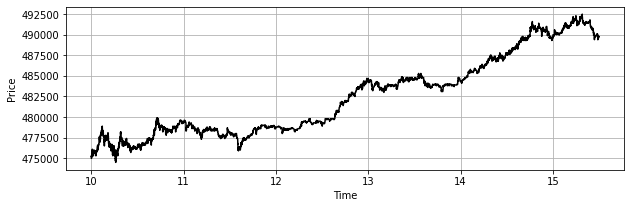

In [231]:
plt.figure(figsize=(10,3))
plt.plot(data["time"]/3600, data["ask_price_1"], "k-")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)

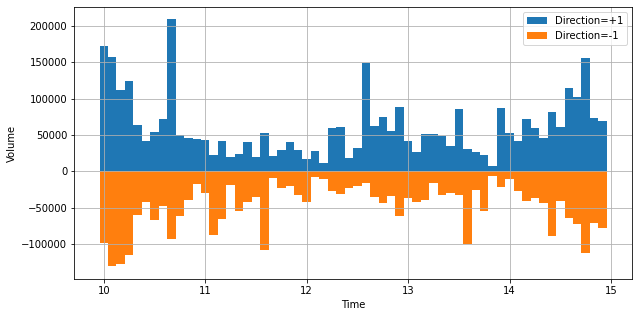

In [232]:
# volume per 5 minute
time_list = []
vol_list_plus = []
vol_list_minus = []
size_bin = 5 #number of minutes er bin
for t in np.arange(10*3600, 15.4*3500, size_bin*60):
    index_bool_minus = ((data["time"]>t) & (data["time"]< (t+size_bin*60)) & (data["direct"]==1) ).astype(bool)
    index_bool_plus = ((data["time"]>t) & (data["time"]< (t+size_bin*60)) & (data["direct"]==-1) ).astype(bool)

    vol_list_plus.append(np.sum(data["vol"][ index_bool_plus ]))
    vol_list_minus.append(np.sum(data["vol"][ index_bool_minus ]))

    time_list.append(t)

plt.figure(figsize=(10,5))
plt.bar(x = np.array(time_list) / 3600, height=np.array(vol_list_plus), width=size_bin/60., label="Direction=+1")
plt.bar(x = np.array(time_list) / 3600, height=-np.array(vol_list_minus), width=size_bin/60., label="Direction=-1")
plt.legend()

plt.xlabel("Time")
plt.ylabel("Volume")
plt.grid(True)

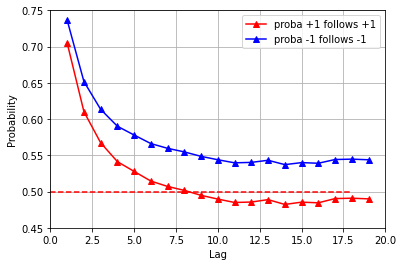

In [233]:
# conditional probabilities that MO with direction up is followed by a MO with direction up
# conditional probabilities that MO with direction down is followed by a MO with direction down

data = data_full[0]
correlation_down = []
correlation_up = []
max_lag = 20
lag_list = range(1,max_lag)
for lag in lag_list:
    proba_same_sign_up = np.sum(  (data["direct"].values[:-lag] == 1)*(data["direct"].values[lag:] == 1) == 1) / np.sum( data["direct"].values[:-lag] == 1 ) 
    proba_same_sign_down = np.sum(  (data["direct"].values[:-lag] == -1)*(data["direct"].values[lag:] == -1) == 1) / np.sum( data["direct"].values[:-lag] == -1 ) 
    correlation_up.append( proba_same_sign_up )
    correlation_down.append( proba_same_sign_down )
    
correlation_up = np.array(correlation_up)
correlation_down = np.array(correlation_down)


plt.plot(lag_list, correlation_up, "r-^", label = "proba +1 follows +1")
plt.plot(lag_list, correlation_down, "b-^", label = "proba -1 follows -1")


plt.ylim(0.45,0.75)
plt.xlim(0,max_lag)
plt.plot([0.5 for _ in correlation_up],"r--")
plt.xlabel("Lag")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)



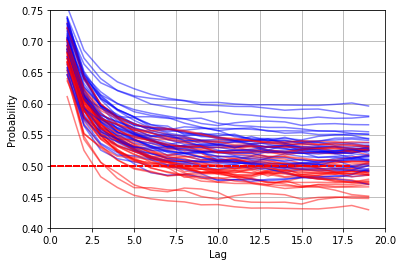

In [234]:
# let us do the same experiments over 10 days to see how stable this is
for data in data_full:
    correlation_down = []
    correlation_up = []
    max_lag = 20
    lag_list = range(1,max_lag)
    for lag in lag_list:
        proba_same_sign_up = np.sum(  (data["direct"].values[:-lag] == 1)*(data["direct"].values[lag:] == 1) == 1) / np.sum( data["direct"].values[:-lag] == 1 ) 
        proba_same_sign_down = np.sum(  (data["direct"].values[:-lag] == -1)*(data["direct"].values[lag:] == -1) == 1) / np.sum( data["direct"].values[:-lag] == -1 ) 
        correlation_up.append( proba_same_sign_up )
        correlation_down.append( proba_same_sign_down )

    plt.plot(lag_list, correlation_up, "r-", label = "proba +1 follows +1", alpha=0.5)
    plt.plot(lag_list, correlation_down, "b-", label = "proba -1 follows -1", alpha=0.5)


    plt.ylim(0.4,0.75)
    plt.xlim(0,max_lag)
    plt.plot([0.5 for _ in correlation_up],"r--")
    plt.xlabel("Lag")
    plt.ylabel("Probability")
    plt.grid(True)

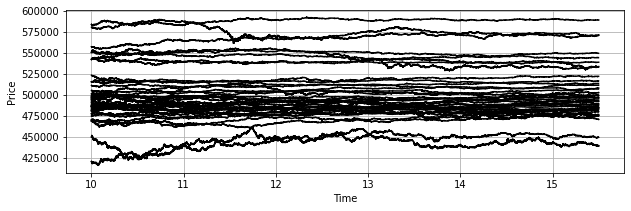

In [235]:
plt.figure(figsize=(10,3))
for data in data_full:
    plt.plot(data["time"]/3600, data["ask_price_1"], "k-")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.grid(True)

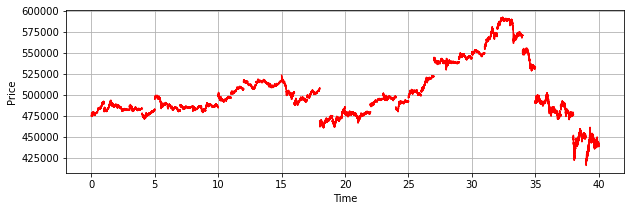

In [246]:
#The days are ordered, so one can plot sequentually the prices
# note that there are discontinuities since we do not consider
# data in between 9:30--10:00 and 15:30--16:00
plt.figure(figsize=(10,3))
for d, data in enumerate(data_full):
    m,M = np.min(data["time"]), np.max(data["time"])
    t_list = d + (data["time"]-m)/(M-m) 
    plt.plot(t_list, data["ask_price_1"], "r-")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.grid(True)

# Imbalanve
Let us look at 
$$Imbalance = \frac{vol(ask)}{vol(bid)+vol(ask)}$$
and see if it is correlated with the direction of the next trade

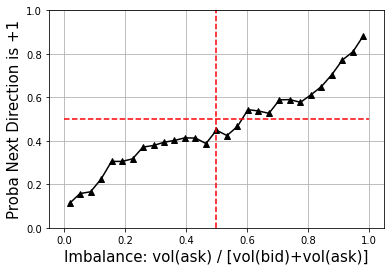

In [236]:
data = data_full[0]
imbalance = data["ask_size_1"] / (data["ask_size_1"]+data["bid_size_1"])
imbalance = imbalance.values[:-1]
direction_next = data["direct"].values[1:]

nbins=30
imbalance_bins = np.linspace(0,1,nbins)
proba_list = []
for k in range(nbins-1):
    low,high = imbalance_bins[k], imbalance_bins[k+1]
    filt = (imbalance > low) & (imbalance < high)
    proba_up = np.mean( (direction_next == 1)[filt] )
    proba_list.append(proba_up)
imbalance_bins = (imbalance_bins[:-1]+imbalance_bins[1:])/2.

plt.plot(imbalance_bins, proba_list, "k-^")
plt.ylim(0,1)
plt.xlabel("Imbalance: vol(ask) / [vol(bid)+vol(ask)]", fontsize=15)
plt.ylabel("Proba Next Direction is +1", fontsize=15)
plt.plot([0,1],[0.5,0.5], "r--")
plt.plot([0.5,0.5], [0,1], "r--")
plt.grid(True)

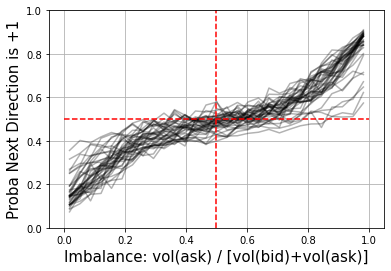

In [237]:
# is it stable?
#data = data_full[0]
for data in data_full:
    imbalance = data["ask_size_1"] / (data["ask_size_1"]+data["bid_size_1"])
    imbalance = imbalance.values[:-1]
    direction_next = data["direct"].values[1:]

    nbins=30
    imbalance_bins = np.linspace(0,1,nbins)
    proba_list = []
    for k in range(nbins-1):
        low,high = imbalance_bins[k], imbalance_bins[k+1]
        filt = (imbalance > low) & (imbalance < high)
        proba_up = np.mean( (direction_next == 1)[filt] )
        proba_list.append(proba_up)
    imbalance_bins = (imbalance_bins[:-1]+imbalance_bins[1:])/2.

    plt.plot(imbalance_bins, proba_list, "k-", alpha=0.3)
    plt.ylim(0,1)
plt.xlabel("Imbalance: vol(ask) / [vol(bid)+vol(ask)]", fontsize=15)
plt.ylabel("Proba Next Direction is +1", fontsize=15)
plt.plot([0,1],[0.5,0.5], "r--")
plt.plot([0.5,0.5], [0,1], "r--")
plt.grid(True)

## Full order book visualization

In [238]:
ask_sizes = []
bid_sizes = []


for k in range(1,11):
    ask_sizes.append( data[f"ask_size_{k}"] )
    bid_sizes.append( data[f"bid_size_{k}"] )

ask_sizes = np.array(ask_sizes)
bid_sizes = np.array(bid_sizes)



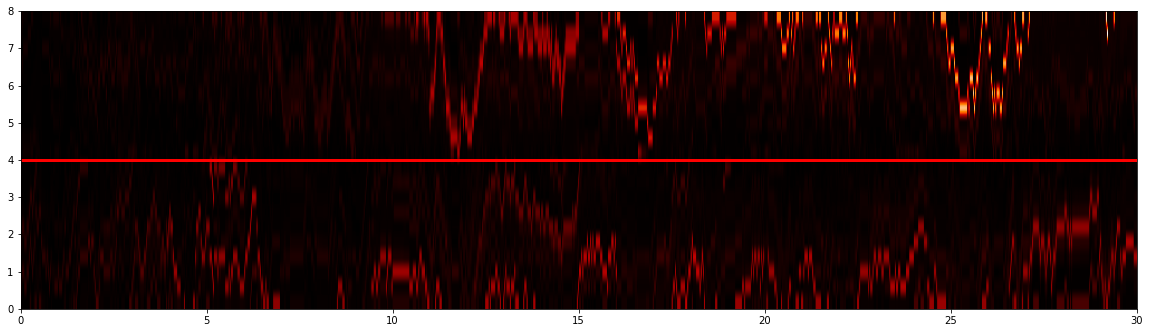

In [239]:
LOB_vol = np.concatenate([bid_sizes[::-1,:], ask_sizes], axis=0)

plt.figure(figsize=(20,10))
X_max = 30
Y_max = 8
plt.imshow( (1 + LOB_vol[:,:1000]), extent=(0,X_max,0,Y_max), cmap="gist_heat", origin="lower", interpolation=None)
plt.plot([0,X_max], [Y_max/2., Y_max/2.], "r-", lw=3)